<a href="https://colab.research.google.com/github/SeYoungMir/TIL/blob/master/%5B2_24%5Dmodelupgrade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

모델의 성능 향상시키기
1. 데이터의 확인과 검증셋


In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd
# 와인 데이터를 불러옵니다.
df = pd.read_csv('./wine.csv', header=None)
# 데이터를 미리 보겠습니다.
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [2]:
# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

In [4]:
# 학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)


In [5]:
# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [7]:
# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25) # 0.8 x 0.25

Epoch 1/50
8/8 [==============================] - 1s 34ms/step - loss: 2.3902 - accuracy: 0.7521 - val_loss: 1.6534 - val_accuracy: 0.7623
Epoch 2/50
8/8 [==============================] - 0s 7ms/step - loss: 1.0652 - accuracy: 0.7513 - val_loss: 0.5805 - val_accuracy: 0.7000
Epoch 3/50
8/8 [==============================] - 0s 7ms/step - loss: 0.6469 - accuracy: 0.6195 - val_loss: 0.4640 - val_accuracy: 0.7608
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 0.4586 - accuracy: 0.7519 - val_loss: 0.4338 - val_accuracy: 0.7777
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 0.3548 - accuracy: 0.8181 - val_loss: 0.3195 - val_accuracy: 0.8623
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 0.2950 - accuracy: 0.8820 - val_loss: 0.2783 - val_accuracy: 0.8977
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 0.2558 - accuracy: 0.9051 - val_loss: 0.2611 - val_accuracy: 0.9092
Epoch 8/50
8/8 [=================

In [8]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])


41/41 [==============================] - 0s 2ms/step - loss: 0.1659 - accuracy: 0.9431
Test accuracy: 0.9430769085884094


2. 모델 업데이트하기

기본 코드 불러오기

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [11]:
# 와인 데이터를 불러옵니다.
df = pd.read_csv('./wine.csv', header=None)
# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]
# 학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [12]:
# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                390       
                                                                 
 dense_5 (Dense)             (None, 12)                372       
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [13]:
# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# 모델 저장의 조건을 설정합니다.
modelpath="./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)
# 모델을 실행합니다. 
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0,callbacks=[checkpointer])


Epoch 1: saving model to ./data/model/all/01-0.8285.hdf5

Epoch 2: saving model to ./data/model/all/02-0.8854.hdf5

Epoch 3: saving model to ./data/model/all/03-0.9162.hdf5

Epoch 4: saving model to ./data/model/all/04-0.9162.hdf5

Epoch 5: saving model to ./data/model/all/05-0.9208.hdf5

Epoch 6: saving model to ./data/model/all/06-0.9223.hdf5

Epoch 7: saving model to ./data/model/all/07-0.9177.hdf5

Epoch 8: saving model to ./data/model/all/08-0.9254.hdf5

Epoch 9: saving model to ./data/model/all/09-0.9354.hdf5

Epoch 10: saving model to ./data/model/all/10-0.9246.hdf5

Epoch 11: saving model to ./data/model/all/11-0.9331.hdf5

Epoch 12: saving model to ./data/model/all/12-0.9308.hdf5

Epoch 13: saving model to ./data/model/all/13-0.9323.hdf5

Epoch 14: saving model to ./data/model/all/14-0.9285.hdf5

Epoch 15: saving model to ./data/model/all/15-0.9315.hdf5

Epoch 16: saving model to ./data/model/all/16-0.9385.hdf5

Epoch 17: saving model to ./data/model/all/17-0.9346.hdf5

Epoch

In [15]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.1326 - accuracy: 0.9577
Test accuracy: 0.9576923251152039


3. 그래프로 과적합 확인하기

In [16]:
# 그래프 확인을 위한 긴 학습 
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25)


Epoch 1/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1200 - accuracy: 0.9577 - val_loss: 0.1181 - val_accuracy: 0.9538
Epoch 2/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.1197 - accuracy: 0.9589 - val_loss: 0.1169 - val_accuracy: 0.9546
Epoch 3/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.1173 - accuracy: 0.9595 - val_loss: 0.1187 - val_accuracy: 0.9538
Epoch 4/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.1179 - accuracy: 0.9582 - val_loss: 0.1248 - val_accuracy: 0.9492
Epoch 5/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.1176 - accuracy: 0.9613 - val_loss: 0.1152 - val_accuracy: 0.9562
Epoch 6/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.1145 - accuracy: 0.9600 - val_loss: 0.1120 - val_accuracy: 0.9554
Epoch 7/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.1124 - accuracy: 0.9595 - val_loss: 0.1200 - val_accuracy: 0.9677
Epoch 8/2000


In [18]:
# history에 저장된 학습 결과를 확인해 보겠습니다. 
hist_df=pd.DataFrame(history.history)
hist_df


,loss,accuracy,val_loss,val_accuracy
0,0.119958,0.957660,0.118134,0.953846
1,0.119707,0.958943,0.116915,0.954615
2,0.117323,0.959456,0.118696,0.953846
3,0.117872,0.958173,0.124792,0.949231
4,0.117612,0.961252,0.115211,0.956154
...,...,...,...,...
1995,0.027072,0.992815,0.038797,0.992308
1996,0.026262,0.994098,0.040786,0.992308
1997,0.026248,0.994355,0.042060,0.993846
1998,0.026221,0.993072,0.040199,0.990769


In [19]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=hist_df['val_loss']
# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist_df['loss']

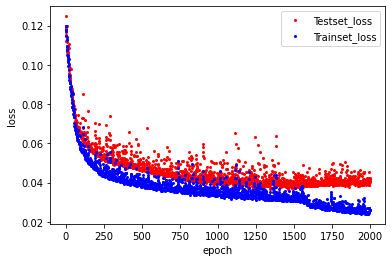

In [20]:
#x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

4. 학습의 자동 중단

기본 코드 불러오기

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd

In [22]:
# 와인 데이터를 불러옵니다.
df = pd.read_csv('./wine.csv', header=None)


In [23]:
# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]
# 학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)


In [24]:
# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                390       
                                                                 
 dense_9 (Dense)             (None, 12)                372       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [25]:
# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
# 학습이 언제 자동 중단될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

In [27]:
# 최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="./data/model/bestmodel.hdf5"
# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)
# 모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1,callbacks=[early_stopping_callback,checkpointer])

Epoch 1/2000
8/8 [==============================] - 1s 35ms/step - loss: 1.4340 - accuracy: 0.7572 - val_loss: 0.8084 - val_accuracy: 0.7423
Epoch 2/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.5610 - accuracy: 0.7988 - val_loss: 0.3302 - val_accuracy: 0.8738
Epoch 3/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3777 - accuracy: 0.8550 - val_loss: 0.2760 - val_accuracy: 0.9085
Epoch 4/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.2908 - accuracy: 0.9163 - val_loss: 0.2542 - val_accuracy: 0.9223
Epoch 5/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.2733 - accuracy: 0.9253 - val_loss: 0.2268 - val_accuracy: 0.9354
Epoch 6/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.2492 - accuracy: 0.9266 - val_loss: 0.2272 - val_accuracy: 0.9315
Epoch 7/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.2421 - accuracy: 0.9276 - val_loss: 0.2154 - val_accuracy: 0.9354
Epoch 8/2000
8

In [28]:
# 테스트 결과를 출력합니다.
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9908
Test accuracy: 0.9907692074775696
